In [2]:
import numpy as np
import pylab as pl
import warnings

from matplotlib import pyplot as plt
from scipy import linalg
from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

### Типы матриц

Вспомним про типы матриц из лекции:

1) m=n => квадратная, иначе прямоугольная

2) m = 1 => матрица-строка

3) n=1 => матрица-столбец

4) нулевая матрица, если все элементы = 0

5) диагональная (единичная)

6) треугольная(нижнетреугольная, верхнетреугольная)

7) ортогональная

Посмотрим на встроенные функции <b>numpy</b> для создания матриц с вышеперечисленными свойствами

#### Создаём матрицу нужной размерности

In [6]:
np.random.rand(6)

array([0.71947513, 0.7491066 , 0.99451285, 0.74729107, 0.93518853,
       0.29844898])

In [8]:
m0 = np.random.rand(1,3)
print(m0)

[[0.84060873 0.03225564 0.97527609]]


In [10]:
np.zeros((4,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

#### Создаём строку

In [3]:
m = np.random.rand(3)
print(m)

[0.29884832 0.12208311 0.90810656]


#### Создаём столбец

In [11]:
m = np.random.rand(6,3)
print(m.T)

[[0.05832253 0.1657534  0.60467938 0.82999369 0.52214511 0.01155794]
 [0.45366365 0.52684805 0.83411089 0.51738511 0.16379635 0.09405569]
 [0.40960944 0.49962404 0.31032872 0.54066139 0.76866323 0.92949018]]


array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

#### Создаём нулевую матрицу

In [5]:
m1 = np.zeros((3,4))
print(m1)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [14]:
np.diag((4,6,7))

array([[4, 0, 0],
       [0, 6, 0],
       [0, 0, 7]])

In [24]:
np.eye(4, 6)

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [16]:
np.diag(np.diag((4,6,7)))

array([4, 6, 7])

In [21]:
np.ones((3))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

#### Можно создать нулевую матрицу размера уже существующей

In [6]:
m1 = np.zeros_like(m0)
print(m0)
print(m1)

[[0.49029309 0.43929917]
 [0.97605085 0.02427954]
 [0.67033136 0.28789665]]
[[0. 0.]
 [0. 0.]
 [0. 0.]]


Создаём диагональную матрицу

In [7]:
m = np.diag([1,2,3])
print(m)

[[1 0 0]
 [0 2 0]
 [0 0 3]]


#### Создаём единичную матрицу

In [8]:
m = np.ones((3,4))
print(m)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [31]:
np.triu([[1,2,3], [11, 22, 33], [111, 222, 333], [7, 8 , 9]], -1)

array([[  1,   2,   3],
       [ 11,  22,  33],
       [  0, 222, 333],
       [  0,   0,   9]])

#### Можно создать нулевую матрицу размера уже существующей

In [9]:
m1 = np.ones_like(m0)
print(m0)
print(m1)

[[0.49029309 0.43929917]
 [0.97605085 0.02427954]
 [0.67033136 0.28789665]]
[[1. 1.]
 [1. 1.]
 [1. 1.]]


#### Также можно создать квадратную единичную матрицу следующей командой:

In [10]:
m = np.eye(3)
print(m)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


#### Можно создавать нижнетреугольные (tril = triangle + lower)

In [11]:
m = np.tril([[1,2,3],[4,5,6],[7,8,9],[10,11,12]], -1)
print(m)

[[ 0  0  0]
 [ 4  0  0]
 [ 7  8  0]
 [10 11 12]]


In [12]:
m = np.tril([[1,2,3],[4,5,6],[7,8,9],[10,11,12]], 0)
print(m)

[[ 1  0  0]
 [ 4  5  0]
 [ 7  8  9]
 [10 11 12]]


#### а также верхнетреугольные (triu = triangle + upper)

In [13]:
m = np.triu([[1,2,3],[4,5,6],[7,8,9],[10,11,12]], -1)
print(m)

[[ 1  2  3]
 [ 4  5  6]
 [ 0  8  9]
 [ 0  0 12]]


In [14]:
m = np.triu([[1,2,3],[4,5,6],[7,8,9],[10,11,12]], 0)
print(m)

[[1 2 3]
 [0 5 6]
 [0 0 9]
 [0 0 0]]


In [39]:
m = np.random.rand(5,3)
m

array([[0.98938219, 0.16693903, 0.23202925],
       [0.49900659, 0.01985751, 0.96600414],
       [0.6936576 , 0.30625   , 0.61283385],
       [0.00694347, 0.98829385, 0.37755781],
       [0.04101911, 0.23630552, 0.84318406]])

In [41]:
m.reshape(3,5)

array([[0.98938219, 0.16693903, 0.23202925, 0.49900659, 0.01985751],
       [0.96600414, 0.6936576 , 0.30625   , 0.61283385, 0.00694347],
       [0.98829385, 0.37755781, 0.04101911, 0.23630552, 0.84318406]])

#### Определитель матрицы

In [15]:
m = np.array([[1, 2, 1], [1, 1, 4], [2, 3, 6]], dtype=np.float32)
det = np.linalg.det(m)
print(m)
print(det)

[[1. 2. 1.]
 [1. 1. 4.]
 [2. 3. 6.]]
-1.0


In [44]:
np.arange(5).reshape(1,5).T

array([[0],
       [1],
       [2],
       [3],
       [4]])

#### Транспонирование матрицы

In [67]:
x = np.arange(0, 32, 2).reshape((4,4))
print(x)

[[ 0  2  4  6]
 [ 8 10 12 14]
 [16 18 20 22]
 [24 26 28 30]]


In [52]:
y = x + x
y = y.T

In [62]:
m = x.dot(y)
m

array([[  10,   28,   46,   64,   82],
       [  28,  100,  172,  244,  316],
       [  46,  172,  298,  424,  550],
       [  64,  244,  424,  604,  784],
       [  82,  316,  550,  784, 1018]])

In [68]:
np.linalg.inv(x)

LinAlgError: Singular matrix

In [17]:
np.transpose(x)

array([[ 0,  3,  6,  9, 12],
       [ 1,  4,  7, 10, 13],
       [ 2,  5,  8, 11, 14]])

#### Сложение и умножение матрицы на скаляр

In [18]:
A = np.array(([1,3,3],[1,4,3],[1,3,4]))
print(A)

[[1 3 3]
 [1 4 3]
 [1 3 4]]


In [19]:
C = A + 100
print(C)

[[101 103 103]
 [101 104 103]
 [101 103 104]]


In [20]:
C = A * 100
print(C)

[[100 300 300]
 [100 400 300]
 [100 300 400]]


#### Обратная матрица

In [60]:
A = np.array(([1,8,3],[1,9,3],[1,3,4]))
print(A)

[[1 8 3]
 [1 9 3]
 [1 3 4]]


In [61]:
A_inv = np.linalg.inv(A)
print(A_inv)

[[ 2.70000000e+01 -2.30000000e+01 -3.00000000e+00]
 [-1.00000000e+00  1.00000000e+00 -1.77635684e-16]
 [-6.00000000e+00  5.00000000e+00  1.00000000e+00]]


In [69]:
I = A_inv.dot(A)
print(I)

[[ 1.00000000e+00  4.08562073e-14  1.59872116e-14]
 [-6.66133815e-17  1.00000000e+00 -2.66453526e-16]
 [ 0.00000000e+00 -2.66453526e-15  1.00000000e+00]]


In [70]:
np.linalg.matrix_rank(I)

3

In [81]:
A

array([[1, 8, 3],
       [1, 9, 3],
       [1, 3, 4]])

In [82]:
np.linalg.eig(A)

(array([11.48186277,  0.03507519,  2.48306204]),
 array([[-0.62893096, -0.97505774, -0.22606594],
        [-0.68893279,  0.03544353, -0.37849783],
        [-0.3603019 ,  0.21910306,  0.89757094]]))

In [88]:
np.linalg.eig(A)[1][:,0]*11.48

array([-7.22012743, -7.90894845, -4.13626576])

In [87]:
A.dot(np.linalg.eig(A)[1][:,0])

array([-7.22129898, -7.91023177, -4.13693692])

#### Ранг матрицы

In [24]:
m = np.array([[1, 2, 3], [1, 1, 1], [2, 2, 2]])
r = np.linalg.matrix_rank(m)
print(m)
print(r)

[[1 2 3]
 [1 1 1]
 [2 2 2]]
2


### Собственные векторы и собственные значения

In [89]:
a = np.array([[-1, -6], [2, 6]])
w, v = np.linalg.eig(a)

In [93]:
v[:, 1]

array([ 0.83205029, -0.5547002 ])

In [26]:
print(a)

[[-1 -6]
 [ 2  6]]


In [27]:
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[:,i]))

Собственное значение 2.0
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]
Собственное значение 3.0
соответствующий ему собственный вектор [ 0.83205029 -0.5547002 ]


### SVD разложение

In [96]:
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

In [97]:
X, y = load_digits(return_X_y=True)

In [30]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [101]:
y[94]

7

In [102]:
X[94]

array([0.00, 0.00, 3.00, 12.00, 16.00, 10.00, 0.00, 0.00, 0.00, 2.00,
       14.00, 12.00, 12.00, 12.00, 0.00, 0.00, 0.00, 5.00, 10.00, 0.00,
       10.00, 11.00, 0.00, 0.00, 0.00, 0.00, 0.00, 1.00, 14.00, 9.00,
       2.00, 0.00, 0.00, 0.00, 8.00, 16.00, 16.00, 16.00, 10.00, 0.00,
       0.00, 0.00, 6.00, 16.00, 13.00, 7.00, 0.00, 0.00, 0.00, 0.00, 0.00,
       16.00, 5.00, 0.00, 0.00, 0.00, 0.00, 0.00, 5.00, 13.00, 0.00, 0.00,
       0.00, 0.00])

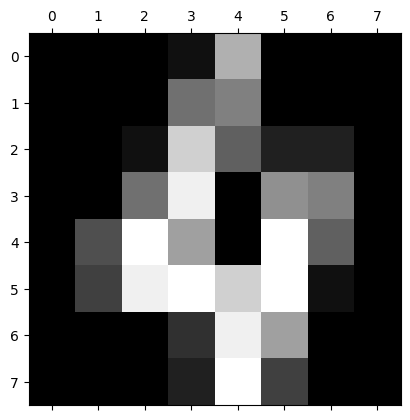

In [125]:
image = X[4].reshape(8, 8)
plt.matshow(image,cmap='gray')

In [ ]:
image = X[0]
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')
plt.show()

In [111]:
X[0].reshape(8,8)

array([[0.00, 0.00, 5.00, 13.00, 9.00, 1.00, 0.00, 0.00],
       [0.00, 0.00, 13.00, 15.00, 10.00, 15.00, 5.00, 0.00],
       [0.00, 3.00, 15.00, 2.00, 0.00, 11.00, 8.00, 0.00],
       [0.00, 4.00, 12.00, 0.00, 0.00, 8.00, 8.00, 0.00],
       [0.00, 5.00, 8.00, 0.00, 0.00, 9.00, 8.00, 0.00],
       [0.00, 4.00, 11.00, 0.00, 1.00, 12.00, 7.00, 0.00],
       [0.00, 2.00, 14.00, 5.00, 10.00, 12.00, 0.00, 0.00],
       [0.00, 0.00, 6.00, 13.00, 10.00, 0.00, 0.00, 0.00]])

In [128]:
u, s, v = np.linalg.svd(image)

In [118]:
s

array([49.32, 24.24, 13.70, 11.51, 5.76, 2.54, 0.47, 0.00])

In [121]:
np.diag(s)

array([[49.32, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
       [0.00, 24.24, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
       [0.00, 0.00, 13.70, 0.00, 0.00, 0.00, 0.00, 0.00],
       [0.00, 0.00, 0.00, 11.51, 0.00, 0.00, 0.00, 0.00],
       [0.00, 0.00, 0.00, 0.00, 5.76, 0.00, 0.00, 0.00],
       [0.00, 0.00, 0.00, 0.00, 0.00, 2.54, 0.00, 0.00],
       [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.47, 0.00],
       [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00]])

In [116]:
u.shape, s.shape, v.shape

((8, 8), (8,), (8, 8))

In [135]:
n_component = 4
u_n = u[:,:n_component]
s_n = np.diag(s[:n_component])
v_n = v[:n_component, :]
X_new = u_n.dot(s_n.dot(v_n))
X_new

array([[0.00, -0.10, -0.96, 1.56, 10.44, 1.10, -1.67, 0.00],
       [0.00, -0.26, -0.01, 7.04, 7.94, 0.11, -0.21, 0.00],
       [0.00, -0.44, 1.48, 12.80, 6.18, 1.65, 2.46, 0.00],
       [0.00, 0.40, 6.52, 15.21, -0.19, 9.37, 7.51, 0.00],
       [0.00, 4.35, 15.74, 10.25, -0.27, 16.55, 5.07, 0.00],
       [0.00, 4.52, 15.31, 15.75, 13.28, 15.45, 1.91, 0.00],
       [0.00, 0.01, 0.77, 2.56, 15.43, 9.14, 1.29, 0.00],
       [0.00, -0.08, -0.58, 2.34, 15.66, 4.67, -1.02, 0.00]])

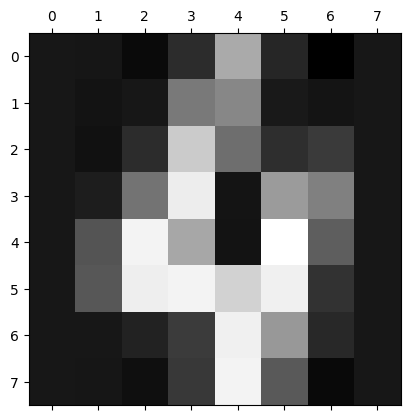

In [136]:
plt.matshow(X_new, cmap='gray')

In [32]:
U, s, V = np.linalg.svd(image)
S = np.zeros((image.shape[0], image.shape[1]))
S[:image.shape[0], :image.shape[0]] = np.diag(s)
n_component = 3
S = S[:, :n_component]
V = V[:n_component, :]
A = U.dot(S.dot(V))
print(A)

[[0.00 -0.79 4.61 13.19 8.75 1.55 0.20 0.00]
 [0.00 1.83 15.30 13.86 11.18 12.21 4.59 0.00]
 [0.00 4.08 13.27 1.91 0.95 11.97 8.72 0.00]
 [0.00 3.69 10.62 0.65 -0.55 9.50 8.09 0.00]
 [0.00 3.41 9.39 0.15 -0.98 8.41 7.51 0.00]
 [0.00 3.55 11.82 -0.08 0.75 11.44 6.77 0.00]
 [0.00 1.15 13.03 5.53 9.41 13.22 0.14 0.00]
 [0.00 -0.87 4.74 13.74 9.19 1.59 0.07 0.00]]


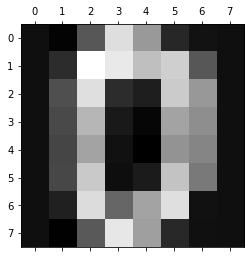

In [33]:
plt.matshow(A, cmap = 'gray')

In [ ]:
rf_o = RandomForestClassifier(oob)

In [34]:
rf_original = RandomForestClassifier(oob_score=True)
rf_original.fit(X, y)
rf_original.oob_score_

0.8703394546466333

In [207]:
svd = TruncatedSVD(n_components=3)
X_reduced = svd.fit_transform(X[0].reshape(8,8))
X_reduced

array([[10.97, 12.23, -2.21],
       [26.04, 6.82, -0.15],
       [18.73, -7.95, -1.55],
       [14.60, -8.08, -2.15],
       [12.72, -7.84, -2.14],
       [16.19, -8.21, 0.43],
       [20.45, 2.05, 6.54],
       [11.36, 12.85, -2.20]])

In [ ]:
X[:2,:]

In [ ]:
X[4].reshape(-1,1)

In [159]:
svd = TruncatedSVD(n_components=16)
X_reduced = svd.fit_transform(X)
svd.explained_variance_ratio_.sum()

0.8479587475796542

In [172]:
X

array([[0.00, 0.00, 5.00, ..., 0.00, 0.00, 0.00],
       [0.00, 0.00, 0.00, ..., 10.00, 0.00, 0.00],
       [0.00, 0.00, 0.00, ..., 16.00, 9.00, 0.00],
       ...,
       [0.00, 0.00, 1.00, ..., 6.00, 0.00, 0.00],
       [0.00, 0.00, 2.00, ..., 12.00, 0.00, 0.00],
       [0.00, 0.00, 10.00, ..., 12.00, 1.00, 0.00]])

In [169]:
X[4].reshape(1,-1)

array([[0.00, 0.00, 0.00, 1.00, 11.00, 0.00, 0.00, 0.00, 0.00, 0.00,
        0.00, 7.00, 8.00, 0.00, 0.00, 0.00, 0.00, 0.00, 1.00, 13.00,
        6.00, 2.00, 2.00, 0.00, 0.00, 0.00, 7.00, 15.00, 0.00, 9.00,
        8.00, 0.00, 0.00, 5.00, 16.00, 10.00, 0.00, 16.00, 6.00, 0.00,
        0.00, 4.00, 15.00, 16.00, 13.00, 16.00, 1.00, 0.00, 0.00, 0.00,
        0.00, 3.00, 15.00, 10.00, 0.00, 0.00, 0.00, 0.00, 0.00, 2.00,
        16.00, 4.00, 0.00, 0.00]])

In [36]:
rf_reduced = RandomForestClassifier(oob_score=True)
rf_reduced.fit(X_reduced, y)
rf_reduced.oob_score_

0.8770172509738453

### Приближение матрицей меньшего ранга

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
from PIL import Image
img = Image.open("image.png")
print(img.size)
arr = np.array(img.getdata())
arr.shape

(262, 252)


(66024, 4)

In [19]:
arr = arr.reshape(img.size)


ValueError: cannot reshape array of size 4464000 into shape (1200,1240)

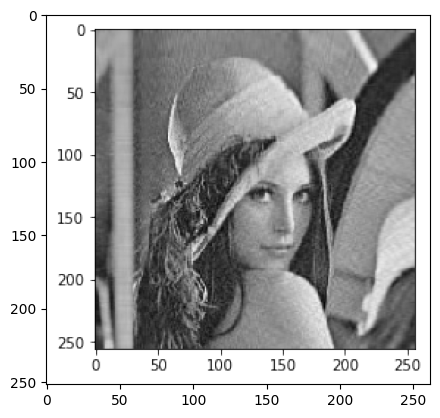

In [22]:
plt.imshow(img)

In [38]:
print(arr.size)
print(arr.size ** 0.5)

65536
256.0


In [39]:
X = np.resize(arr, (256, 256))

In [213]:
tt = np.random.rand(3,5)
tt

array([[0.08, 0.45, 0.93, 0.01, 0.78],
       [0.31, 0.71, 0.01, 0.11, 0.64],
       [0.80, 0.26, 0.87, 0.55, 0.18]])

In [216]:
tt[tt < 0.6] = 0
tt

array([[0.00, 0.00, 0.93, 0.00, 0.78],
       [0.00, 0.71, 0.00, 0.00, 0.64],
       [0.80, 0.00, 0.87, 0.00, 0.00]])

In [40]:
U, d, Vt = linalg.svd(X)
D = linalg.diagsvd(d, X.shape[0], X.shape[1])

5


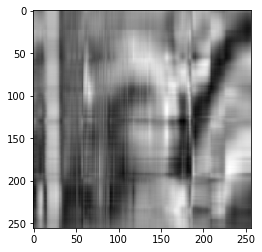

10


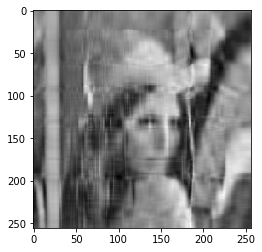

15


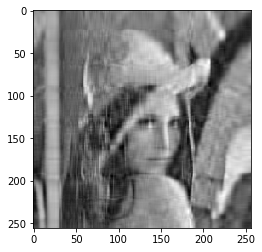

20


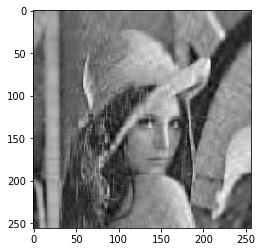

25


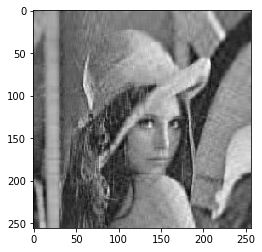

30


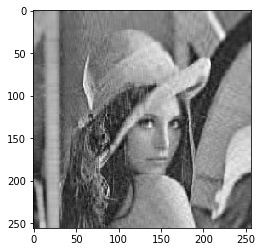

35


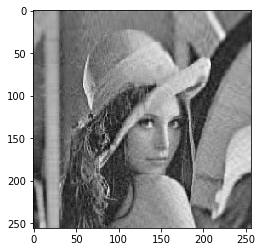

40


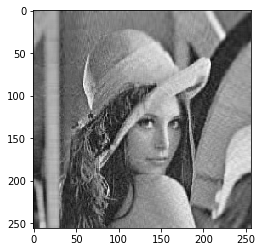

45


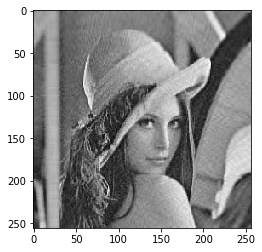

In [41]:
for k in range(5, 50, 5):
    D1 = D.copy()
    D1[D1 < d[int(k)]] = 0
    print (int(k))
    X1 = np.dot(np.dot(U, D1), Vt)
    pl.imshow(X1, cmap='gray')
    pl.show()